### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np

##### Loading data sets

In [2]:
#load events dataset
events = pd.read_csv('events.csv', sep=',')

In [3]:
events

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN
2756097,1438399813142,762376,view,115946,NaN
2756098,1438397820527,1251746,view,78144,NaN
2756099,1438398530703,1184451,view,283392,NaN


In [4]:
#duplicating event table
dup_event = events.copy()

In [5]:
# Convert timestamp to datetime
dup_event["timestamp"] = pd.to_datetime(events["timestamp"], unit="ms")

In [6]:
dup_event

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12.117,257597,view,355908,NaN
1,2015-06-02 05:50:14.164,992329,view,248676,NaN
2,2015-06-02 05:13:19.827,111016,view,318965,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,NaN
4,2015-06-02 05:02:17.106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,2015-08-01 03:13:05.939,591435,view,261427,NaN
2756097,2015-08-01 03:30:13.142,762376,view,115946,NaN
2756098,2015-08-01 02:57:00.527,1251746,view,78144,NaN
2756099,2015-08-01 03:08:50.703,1184451,view,283392,NaN


In [7]:
#loading item properties 
ip1 = pd.read_csv("item_properties_part1.csv", sep=',')
ip2 = pd.read_csv("item_properties_part2.csv", sep=',')

In [8]:
ip1
ip2

,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062
...,...,...,...,...
9275898,1433646000000,236931,929,n12.000
9275899,1440903600000,455746,6,150169 639134
9275900,1439694000000,347565,686,610834
9275901,1433646000000,287231,867,769062


In [9]:
# Item Properties (combine from the 2 files)
item_properties = pd.concat([ip1, ip2], ignore_index=True)

In [10]:
item_properties

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
...,...,...,...,...
20275897,1433646000000,236931,929,n12.000
20275898,1440903600000,455746,6,150169 639134
20275899,1439694000000,347565,686,610834
20275900,1433646000000,287231,867,769062


In [11]:
#creating a copy of the item properties dataset
dup_item_properties = item_properties.copy()

In [12]:
dup_item_properties

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
...,...,...,...,...
20275897,1433646000000,236931,929,n12.000
20275898,1440903600000,455746,6,150169 639134
20275899,1439694000000,347565,686,610834
20275900,1433646000000,287231,867,769062


In [13]:
# Convert timestamp to datetime
dup_item_properties["timestamp"] = pd.to_datetime(dup_item_properties["timestamp"], unit="ms")

In [14]:
dup_item_properties

,timestamp,itemid,property,value
0,2015-06-28 03:00:00,460429,categoryid,1338
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200
2,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566
3,2015-05-10 03:00:00,59481,790,n15360.000
4,2015-05-17 03:00:00,156781,917,828513
...,...,...,...,...
20275897,2015-06-07 03:00:00,236931,929,n12.000
20275898,2015-08-30 03:00:00,455746,6,150169 639134
20275899,2015-08-16 03:00:00,347565,686,610834
20275900,2015-06-07 03:00:00,287231,867,769062


In [15]:
# Category tree
category_tree = pd.read_csv("category_tree.csv")
category_tree

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
...,...,...
1664,49,1125.0
1665,1112,630.0
1666,1336,745.0
1667,689,207.0


In [16]:
dup_category_tree = category_tree.copy()

##### Cleaning

In [17]:
dup_event

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12.117,257597,view,355908,NaN
1,2015-06-02 05:50:14.164,992329,view,248676,NaN
2,2015-06-02 05:13:19.827,111016,view,318965,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,NaN
4,2015-06-02 05:02:17.106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,2015-08-01 03:13:05.939,591435,view,261427,NaN
2756097,2015-08-01 03:30:13.142,762376,view,115946,NaN
2756098,2015-08-01 02:57:00.527,1251746,view,78144,NaN
2756099,2015-08-01 03:08:50.703,1184451,view,283392,NaN


In [18]:
dup_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      datetime64[ns]
 1   visitorid      int64         
 2   event          object        
 3   itemid         int64         
 4   transactionid  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 105.1+ MB


In [19]:
#converting transactionid to a more appropriate string type 
dup_event['transactionid'] = dup_event['transactionid'].astype('Int64').astype(str)

In [20]:
#since numeric columns have no matematical meaning and are meant to be categorical, convert to string
dup_event["itemid"] = dup_event["itemid"].astype(str)
dup_event["visitorid"] = dup_event["visitorid"].astype(str)

In [21]:
dup_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      datetime64[ns]
 1   visitorid      object        
 2   event          object        
 3   itemid         object        
 4   transactionid  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 105.1+ MB


In [22]:
#checking for nulls
dup_event.isnull().sum()

#as expected, no nulls

timestamp        0
visitorid        0
event            0
itemid           0
transactionid    0
dtype: int64

In [23]:
dup_event["event"].value_counts()

#in accordance with expected consumer behaviour, views are exponential more than addtochart and transaction.

event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64

In [24]:
#now to item properties

dup_item_properties

,timestamp,itemid,property,value
0,2015-06-28 03:00:00,460429,categoryid,1338
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200
2,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566
3,2015-05-10 03:00:00,59481,790,n15360.000
4,2015-05-17 03:00:00,156781,917,828513
...,...,...,...,...
20275897,2015-06-07 03:00:00,236931,929,n12.000
20275898,2015-08-30 03:00:00,455746,6,150169 639134
20275899,2015-08-16 03:00:00,347565,686,610834
20275900,2015-06-07 03:00:00,287231,867,769062


In [25]:
#looking more closely at property column
dup_item_properties['property'].unique()

array(['categoryid', '888', '400', ..., '1091', '522', '769'],
      dtype=object)

In [26]:
dup_item_properties["property"].value_counts()

property
888           3000398
790           1790516
available     1503639
categoryid     788214
6              631471
               ...   
782                 1
288                 1
722                 1
744                 1
769                 1
Name: count, Length: 1104, dtype: int64

In [27]:
#i want to see how the rows with availble property look like to confirm documentation

# Filter rows where the 'property' column is exactly 'available'
available_rows = dup_item_properties[dup_item_properties['property'] == 'available']

# View the result
print(available_rows)


                   timestamp  itemid   property value
5        2015-07-05 03:00:00  285026  available     0
15       2015-07-19 03:00:00  186518  available     0
79       2015-06-07 03:00:00  423682  available     0
82       2015-06-14 03:00:00  316253  available     1
96       2015-07-19 03:00:00  430459  available     0
...                      ...     ...        ...   ...
20275845 2015-08-30 03:00:00  229797  available     0
20275855 2015-08-02 03:00:00  225378  available     1
20275889 2015-05-31 03:00:00  356167  available     0
20275891 2015-08-09 03:00:00  200211  available     0
20275896 2015-07-05 03:00:00   74745  available     0

[1503639 rows x 4 columns]


In [28]:
#cleaning up the value column based on the property column
import re

# Create filters
category_filter = dup_item_properties["property"] == "categoryid"
available_filter = dup_item_properties["property"] == "available"
other_filter = ~(category_filter | available_filter)  # everything else

# Initialize decoded_value as NaN
dup_item_properties["decoded_value"] = np.nan

# For "available", convert value to int
dup_item_properties.loc[available_filter, "decoded_value"] = dup_item_properties.loc[available_filter, "value"].astype(int)

# For "categoryid", keep the original value (or you could decode it differently if needed)
dup_item_properties.loc[category_filter, "decoded_value"] = dup_item_properties.loc[category_filter, "value"]

# For all numeric-like values
def extract_all_numeric(val):
    if isinstance(val, str):
        # Find all matches like 'n25.400', 'n-25.400'
        matches = re.findall(r"n(-?\d+\.\d+)", val)
        try:
            return [float(m) for m in matches]
        except:
            return [np.nan] * len(matches) if matches else []
    return [val]  # Wrap non-string values in a list


# For everything else, apply extract_all_numeric and keep the whole list
dup_item_properties.loc[other_filter, "decoded_value"] = dup_item_properties.loc[other_filter, "value"].apply(extract_all_numeric)

In [29]:
dup_item_properties

,timestamp,itemid,property,value,decoded_value
0,2015-06-28 03:00:00,460429,categoryid,1338,1338
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200,[277.2]
2,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566,"[552.0, 720.0]"
3,2015-05-10 03:00:00,59481,790,n15360.000,[15360.0]
4,2015-05-17 03:00:00,156781,917,828513,[]
...,...,...,...,...,...
20275897,2015-06-07 03:00:00,236931,929,n12.000,[12.0]
20275898,2015-08-30 03:00:00,455746,6,150169 639134,[]
20275899,2015-08-16 03:00:00,347565,686,610834,[]
20275900,2015-06-07 03:00:00,287231,867,769062,[]


In [30]:
#multiple numbers in the list may causing issues when we get to modelling as one value per feature per item is generally expected
#averaging where multiple numerics are observed in decoded_value to remove duplicates and maintain one value that effectively 
#represents all the values observed

def average_list(val):
    if isinstance(val, list):
        if len(val) > 0:
            return sum(val) / len(val)
        else:
            return np.nan  # Replace [] with NaN
    return val


dup_item_properties["decoded_value"] = dup_item_properties["decoded_value"].apply(average_list)

In [31]:
dup_item_properties

,timestamp,itemid,property,value,decoded_value
0,2015-06-28 03:00:00,460429,categoryid,1338,1338
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200,277.2
2,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566,636.0
3,2015-05-10 03:00:00,59481,790,n15360.000,15360.0
4,2015-05-17 03:00:00,156781,917,828513,NaN
...,...,...,...,...,...
20275897,2015-06-07 03:00:00,236931,929,n12.000,12.0
20275898,2015-08-30 03:00:00,455746,6,150169 639134,NaN
20275899,2015-08-16 03:00:00,347565,686,610834,NaN
20275900,2015-06-07 03:00:00,287231,867,769062,NaN


In [32]:
dup_item_properties.duplicated().sum()

0

In [33]:
#I am unable to transform because of duplicates
dup_item_properties.groupby(["itemid", "property"]).size().reset_index(name="count").query("count > 1")

,itemid,property,count
16,0,6,18
54,1,790,18
57,1,888,18
61,1,available,18
94,3,283,18
...,...,...,...
12003737,466864,790,18
12003738,466864,813,16
12003740,466864,888,18
12003743,466864,available,18


In [34]:
#sorting the dataframe by timestamp

dup_item_properties = dup_item_properties.sort_values("timestamp")

In [35]:
#keeping only the latest(most recent) entry for a combination of itemid and property
latest_props = (
    dup_item_properties
    .groupby(["itemid", "property"], as_index=False)
    .last()  # Keeps the last (i.e., most recent) row per group
)

In [36]:
#transforming the dataset into wide form
item_matrix = latest_props.pivot(index="itemid", columns="property", values="decoded_value").reset_index()

In [37]:
item_matrix

property,itemid,0,1,10,100,1000,1001,1002,1003,1004,...,992,993,994,995,996,997,998,999,available,categoryid
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,209
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1114
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1305
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1171
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417048,466862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1376
417049,466863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,173
417050,466864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,373
417051,466865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,0.0,421


In [38]:
#doing a sanity check before deciding on how to tackle available column
item_matrix["available"].unique()

array([0.0, 1.0], dtype=object)

In [39]:
#converting available column into integer since it's a binary category
item_matrix["available"] = item_matrix["available"].astype("Int64")  # with capital 'I' to cover possible nulls

In [40]:
#doing a sanity check before deciding on how to tackle available column
item_matrix["itemid"].unique()

array([     0,      1,      2, ..., 466864, 466865, 466866], dtype=int64)

In [41]:
#converting available column into integer since it's a binary category
item_matrix["itemid"] = item_matrix["itemid"].astype(str)

In [42]:
item_matrix

property,itemid,0,1,10,100,1000,1001,1002,1003,1004,...,992,993,994,995,996,997,998,999,available,categoryid
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,209
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1114
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1305
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1171
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417048,466862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1376
417049,466863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,173
417050,466864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,373
417051,466865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,421


In [43]:
dup_category_tree

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
...,...,...
1664,49,1125.0
1665,1112,630.0
1666,1336,745.0
1667,689,207.0


In [44]:
dup_category_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


In [45]:
#converting the categories into the appropriate sting datatype
dup_category_tree["categoryid"] = dup_category_tree["categoryid"].astype(str)


# keeping NaNs, converting others to int first since it's currently a float
dup_category_tree["parentid"] = dup_category_tree["parentid"].apply(
    lambda x: str(int(x)) if pd.notna(x) else np.nan
)

In [46]:
dup_category_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   categoryid  1669 non-null   object
 1   parentid    1644 non-null   object
dtypes: object(2)
memory usage: 26.2+ KB


In [47]:
#building hierarchy for the categories to better understand relationships when learning

def get_ancestors(cat_id, tree_dict):
    path = []
    while cat_id in tree_dict and pd.notna(tree_dict[cat_id]):
        cat_id = tree_dict[cat_id]
        path.append(cat_id)
    return path

# Build the mapping from child to parent
tree_dict = dict(zip(dup_category_tree["categoryid"], dup_category_tree["parentid"]))

# Compute the list of ancestors for each categoryid
dup_category_tree["ancestors"] = dup_category_tree["categoryid"].apply(lambda x: get_ancestors(x, tree_dict))

In [48]:
dup_category_tree

,categoryid,parentid,ancestors
0,1016,213,"[213, 1299, 1532]"
1,809,169,"[169, 1257, 395]"
2,570,9,"[9, 351, 653]"
3,1691,885,"[885, 1579]"
4,536,1691,"[1691, 885, 1579]"
...,...,...,...
1664,49,1125,"[1125, 113, 1532]"
1665,1112,630,"[630, 679]"
1666,1336,745,"[745, 540, 140]"
1667,689,207,"[207, 1490]"


### Model Prep

In [49]:
#merging key attributes from my item properties table to the event table

# Add 'categoryid' and 'available' to events
updated_event = dup_event.merge(
    item_matrix[["itemid", "categoryid", "available"]],
    on="itemid",
    how="left"
)

In [50]:
updated_event

,timestamp,visitorid,event,itemid,transactionid,categoryid,available
0,2015-06-02 05:02:12.117,257597,view,355908,<NA>,1173,1
1,2015-06-02 05:50:14.164,992329,view,248676,<NA>,1231,1
2,2015-06-02 05:13:19.827,111016,view,318965,<NA>,NaN,<NA>
3,2015-06-02 05:12:35.914,483717,view,253185,<NA>,914,0
4,2015-06-02 05:02:17.106,951259,view,367447,<NA>,491,0
...,...,...,...,...,...,...,...
2756096,2015-08-01 03:13:05.939,591435,view,261427,<NA>,1623,0
2756097,2015-08-01 03:30:13.142,762376,view,115946,<NA>,1616,0
2756098,2015-08-01 02:57:00.527,1251746,view,78144,<NA>,969,1
2756099,2015-08-01 03:08:50.703,1184451,view,283392,<NA>,1589,1


In [51]:
#i am only interested in available items to train the model 
event_avail = updated_event[updated_event["available"] == 1]

In [52]:
#not all events are created equal, I want buying to be intepreted as more important than addtocart and so on.
event_weights = {
    "view": 1,
    "addtocart": 3,
    "transaction": 5
}
event_avail.loc[:,"event_weight"] = events["event"].map(event_weights)

C:\Users\COMPUFY\AppData\Local\Temp\ipykernel_15024\2859977626.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_avail.loc[:,"event_weight"] = events["event"].map(event_weights)


In [53]:
event_avail

,timestamp,visitorid,event,itemid,transactionid,categoryid,available,event_weight
0,2015-06-02 05:02:12.117,257597,view,355908,<NA>,1173,1,1
1,2015-06-02 05:50:14.164,992329,view,248676,<NA>,1231,1,1
6,2015-06-02 05:12:03.240,810725,view,443030,<NA>,1098,1,1
7,2015-06-02 05:34:51.897,794181,view,439202,<NA>,1542,1,1
10,2015-06-02 05:16:02.373,176446,view,10572,<NA>,1037,1,1
...,...,...,...,...,...,...,...,...
2756092,2015-08-01 03:07:53.572,709520,view,104512,<NA>,1477,1,1
2756093,2015-08-01 03:41:38.250,226214,view,190530,<NA>,1681,1,1
2756094,2015-08-01 03:21:29.446,701750,view,296172,<NA>,624,1,1
2756098,2015-08-01 02:57:00.527,1251746,view,78144,<NA>,969,1,1


In [54]:
#i want to express how strongly a user interacted with a particular item.
# Aggregate weights (sum of actions per user-item)
event_interaction = event_avail.groupby(["visitorid", "itemid"])["event_weight"].sum().reset_index()
event_interaction.rename(columns={"event_weight": "interaction_score"}, inplace=True)

In [55]:
event_interaction

,visitorid,itemid,interaction_score
0,0,285930,1
1,0,357564,1
2,0,67045,1
3,1000,248975,1
4,10000,401285,3
...,...,...,...
753252,999996,182000,2
753253,999996,28219,1
753254,999996,371008,1
753255,999996,51259,2


In [56]:
duplicates = event_interaction[event_interaction.duplicated(keep=False)]  # keep=False shows *all* occurrences

print("Duplicated rows:")
print(duplicates)

Duplicated rows:
Empty DataFrame
Columns: [visitorid, itemid, interaction_score]
Index: []


In [57]:
event_interaction.describe()

,interaction_score
count,753257.000000
mean,1.561354
std,2.045942
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,308.000000


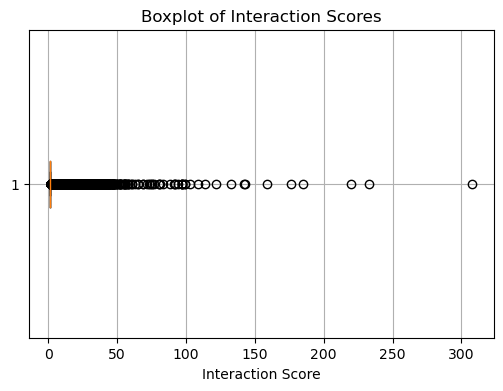

In [58]:
#i want to see the distribution of interaction score

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.boxplot(event_interaction["interaction_score"], vert=False)
plt.title("Boxplot of Interaction Scores")
plt.xlabel("Interaction Score")
plt.grid(True)
plt.show()


In [59]:
#looking at the boxplot leads me to believe events with interaction scores higher than 150(decided threshold) are abnormal users
# i don't want these to interfer with my model so I am dropping them
event_interaction = event_interaction[event_interaction["interaction_score"] <= 150]

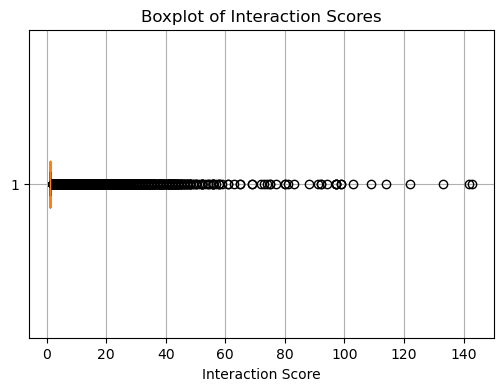

In [60]:
plt.figure(figsize=(6, 4))
plt.boxplot(event_interaction["interaction_score"], vert=False)
plt.title("Boxplot of Interaction Scores")
plt.xlabel("Interaction Score")
plt.grid(True)
plt.show()

#fewer outliers now

### Training

In [61]:
interaction_df = event_interaction.copy()

In [63]:
import pandas as pd
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares
import numpy as np

# SAFE ENCODING HELPERS
def safe_label_encode(series):
    """Label encode while keeping a mapping for future use."""
    unique_values = series.unique()
    mapping = {value: idx for idx, value in enumerate(unique_values)}
    encoded = series.map(mapping)
    return encoded, mapping

def safe_transform(value, mapping):
    """Transform a raw ID into encoded index, return None if unseen."""
    return mapping.get(value, None)


# ENCODE USERS & ITEMS
interaction_df['user_index'], user_mapping = safe_label_encode(interaction_df['visitorid'])
interaction_df['item_index'], item_mapping = safe_label_encode(interaction_df['itemid'])

# CREATE USER-ITEM MATRIX
user_items_csr = csr_matrix(
    (interaction_df['interaction_score'],
     (interaction_df['user_index'], interaction_df['item_index'])),
    shape=(len(user_mapping), len(item_mapping))
)

# TRAIN ALS MODEL
model = AlternatingLeastSquares(
    factors=50,
    regularization=0.01,
    iterations=15,
    random_state=42
)
model.fit(user_items_csr)

# Reverse mapping for items
idx_to_item = {v: k for k, v in item_mapping.items()}

# GET RECOMMENDATIONS FOR A SPECIFIC USER
target_user_id = 'some_user_id_here'  # Raw visitorid
target_user_idx = safe_transform(target_user_id, user_mapping)

if target_user_idx is None:
    print("User not found in training data. Showing popular items instead.")
    item_popularity = np.array(user_items_csr.sum(axis=0)).flatten()
    top_items = item_popularity.argsort()[::-1][:10]
    popular_items = [idx_to_item[i] for i in top_items]
    print(popular_items)

else:
    recommended = model.recommend(
        userid=target_user_idx,
        user_items=user_items_csr[target_user_idx],
        N=10,
        filter_already_liked_items=True
    )

    # Filter out unseen items (just in case)
    safe_recommended_items = []
    for item_idx, score in recommended:
        if item_idx in idx_to_item:
            safe_recommended_items.append((idx_to_item[item_idx], score))
        else:
            print(f"⚠ Skipping unseen item index {item_idx}")

    print(safe_recommended_items)

  0%|          | 0/15 [00:00<?, ?it/s]

User not found in training data. Showing popular items instead.
['461686', '5411', '219512', '320130', '7943', '384302', '312728', '111530', '441668', '234255']


#### Evaluating the model

In [64]:
event_avail

,timestamp,visitorid,event,itemid,transactionid,categoryid,available,event_weight
0,2015-06-02 05:02:12.117,257597,view,355908,<NA>,1173,1,1
1,2015-06-02 05:50:14.164,992329,view,248676,<NA>,1231,1,1
6,2015-06-02 05:12:03.240,810725,view,443030,<NA>,1098,1,1
7,2015-06-02 05:34:51.897,794181,view,439202,<NA>,1542,1,1
10,2015-06-02 05:16:02.373,176446,view,10572,<NA>,1037,1,1
...,...,...,...,...,...,...,...,...
2756092,2015-08-01 03:07:53.572,709520,view,104512,<NA>,1477,1,1
2756093,2015-08-01 03:41:38.250,226214,view,190530,<NA>,1681,1,1
2756094,2015-08-01 03:21:29.446,701750,view,296172,<NA>,624,1,1
2756098,2015-08-01 02:57:00.527,1251746,view,78144,<NA>,969,1,1


In [67]:
#i want to evaluate my model with temporal validation,(train on past, test on future) so i need timestamp
event_with_time = (
    event_avail
    .groupby(['visitorid', 'itemid'])
    .agg(
        interaction_score=('event_weight', 'sum'),
        last_timestamp=('timestamp', 'max')  # keep most recent timestamp
    )
    .reset_index()
)

event_with_time

,visitorid,itemid,interaction_score,last_timestamp
0,0,285930,1,2015-09-11 20:49:49.439
1,0,357564,1,2015-09-11 20:52:39.591
2,0,67045,1,2015-09-11 20:55:17.175
3,1000,248975,1,2015-07-05 13:38:36.161
4,10000,401285,3,2015-07-15 21:59:51.309
...,...,...,...,...
753252,999996,182000,2,2015-08-19 05:57:47.818
753253,999996,28219,1,2015-08-13 04:06:19.266
753254,999996,371008,1,2015-08-12 03:22:33.311
753255,999996,51259,2,2015-08-28 17:08:45.039


In [73]:
event_with_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753257 entries, 0 to 753256
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   visitorid          753257 non-null  object        
 1   itemid             753257 non-null  object        
 2   interaction_score  753257 non-null  int64         
 3   last_timestamp     753257 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 23.0+ MB


In [70]:
def temporal_train_test_split(event_with_time, test_ratio=0.2):
    train_list = []
    test_list = []
    for user, group in event_with_time.groupby('visitorid'):
        group = group.sort_values('last_timestamp')
        cutoff = int(len(group) * (1 - test_ratio))
        train_list.append(group.iloc[:cutoff])
        test_list.append(group.iloc[cutoff:])
    return pd.concat(train_list), pd.concat(test_list)

train_eval_df, test_eval_df = temporal_train_test_split(event_with_time, test_ratio=0.2)

In [74]:
user_map = {u: i for i, u in enumerate(train_eval_df['visitorid'].unique())}
item_map = {i: j for j, i in enumerate(train_eval_df['itemid'].unique())}

train_eval_df['user_idx'] = train_eval_df['visitorid'].map(user_map)
train_eval_df['item_idx'] = train_eval_df['itemid'].map(item_map)
test_eval_df['user_idx'] = test_eval_df['visitorid'].map(user_map)
test_eval_df['item_idx'] = test_eval_df['itemid'].map(item_map)

user_items_train_eval = csr_matrix(
    (train_eval_df['interaction_score'], (train_eval_df['user_idx'], train_eval_df['item_idx']))
)


# Drop any test rows with NaN mapping
test_eval_df = test_eval_df.dropna(subset=['user_idx', 'item_idx'])

# Convert to int
test_eval_df['user_idx'] = test_eval_df['user_idx'].astype(int)
test_eval_df['item_idx'] = test_eval_df['item_idx'].astype(int)

# Now create the sparse matrix
user_items_test_eval = csr_matrix(
    (test_eval_df['interaction_score'], (test_eval_df['user_idx'], test_eval_df['item_idx']))
)

In [75]:
from implicit.evaluation import precision_at_k, mean_average_precision_at_k

K = 10
print("Precision@10:", precision_at_k(model, user_items_train_eval, user_items_test_eval, K=K))
print("MAP@10:", mean_average_precision_at_k(model, user_items_train_eval, user_items_test_eval, K=K))

  0%|          | 0/100866 [00:00<?, ?it/s]

Precision@10: 0.0010328829286464153


  0%|          | 0/100866 [00:00<?, ?it/s]

MAP@10: 0.00035534650875796575
